# Modelo Provincias

Santa Fe, Cordoba, Buenos aires interior y Costa de Buenos Aires

### Importacion de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [2]:
data = pd.read_csv('../Data/combo_provincias.csv',index_col=0)

In [3]:
data.sample(10)

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2
3261,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,NaN,Mar del plata,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,NaN,3.0,84900.000000,50.0,0.0,50.0,1698.000000
6045,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,NaN,Mar del plata,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,2.0,75900.000000,38.0,2.0,40.0,1897.500000
296,house,Córdoba,Córdoba,Villa Santa Cruz del Lago,NaN,Villa santa cruz del lago,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32360.279716,42.0,238.0,280.0,115.572428
4620,apartment,Córdoba,Córdoba,Córdoba,NaN,Córdoba,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,NaN,2.0,56083.670000,NaN,NaN,50.0,1121.673400
2299,apartment,Córdoba,Córdoba,Córdoba,NaN,Córdoba,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,2.0,69000.000000,40.0,0.0,40.0,1725.000000
5081,apartment,Buenos Aires Costa Atlántica,BsAs,San Bernardo,NaN,San bernardo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,2.0,43000.000000,29.0,0.0,29.0,1482.758621
9805,house,Córdoba,Córdoba,Córdoba,NaN,Córdoba,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,220000.000000,196.0,134.0,330.0,666.666667
198,apartment,Córdoba,Córdoba,Córdoba,NaN,Córdoba,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,NaN,1.0,39000.000000,40.0,0.0,40.0,975.000000
3866,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,NaN,Mar del plata,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,1.0,59800.000000,28.0,0.0,28.0,2135.714286
5942,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,NaN,Mar del plata,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,3.0,82000.000000,NaN,NaN,60.0,1366.666667


## Análisis de los Datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10291 entries, 0 to 10290
Data columns (total 21 columns):
tipo_propiedad      10291 non-null object
Provincia           10291 non-null object
Zona                10291 non-null object
Localidad           9489 non-null object
Barrio              517 non-null object
place_name          10291 non-null object
cochera             10291 non-null float64
gimnasio            10291 non-null float64
piscina             10291 non-null float64
SUM                 10291 non-null float64
laundry             10291 non-null float64
balcon              10291 non-null float64
patio               10291 non-null float64
parrilla            10291 non-null float64
floor               4572 non-null float64
rooms               10291 non-null float64
price_usd           10291 non-null float64
sup_cub             8434 non-null float64
sup_descub          7790 non-null float64
sup_total           9647 non-null float64
price_usd_per_m2    10291 non-null float64
d

Verificaciones de superficies:

In [5]:
data.loc[data["sup_cub"]>data["sup_total"], "Localidad"].value_counts()

Series([], Name: Localidad, dtype: int64)

In [6]:
data.loc[data["sup_total"]==0, "Localidad"].value_counts()

Series([], Name: Localidad, dtype: int64)

In [7]:
data.loc[data["sup_cub"]==0, "Localidad"].value_counts()

Series([], Name: Localidad, dtype: int64)

In [8]:
sup_invertidas_drop = data.loc[(data['sup_cub'])>(data['sup_total'])].index
print("Se va a dropear {} por error en superficies.".format(sup_invertidas_drop.size))

Se va a dropear 0 por error en superficies.


In [9]:
data.loc[(data['sup_cub'].isna())&(data["sup_total"].isna())]

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2


In [10]:
data.loc[(data['sup_cub'].isna())&(data["sup_total"].isna())&(data["sup_descub"].isna())]

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2


Al parecer no tenemos superdicies cubiertas nulas, ni superficies totales nulas. Tampoco hay casos donde la superficie cubierta sea mayor a la total. Continuamos:

In [11]:
data.columns

Index(['tipo_propiedad', 'Provincia', 'Zona', 'Localidad', 'Barrio',
       'place_name', 'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry',
       'balcon', 'patio', 'parrilla', 'floor', 'rooms', 'price_usd', 'sup_cub',
       'sup_descub', 'sup_total', 'price_usd_per_m2'],
      dtype='object')

In [12]:
data.shape

(10291, 21)

In [13]:
data.isna().sum()

tipo_propiedad         0
Provincia              0
Zona                   0
Localidad            802
Barrio              9774
place_name             0
cochera                0
gimnasio               0
piscina                0
SUM                    0
laundry                0
balcon                 0
patio                  0
parrilla               0
floor               5719
rooms                  0
price_usd              0
sup_cub             1857
sup_descub          2501
sup_total            644
price_usd_per_m2       0
dtype: int64

In [14]:
data.loc[data['Barrio'].notnull(),['Provincia']].sample(10)

,Provincia
8105,Buenos Aires Costa Atlántica
9039,Buenos Aires Costa Atlántica
2602,Buenos Aires Interior
2322,Buenos Aires Interior
3231,Buenos Aires Interior
623,Buenos Aires Interior
3429,Buenos Aires Interior
3396,Buenos Aires Costa Atlántica
4981,Buenos Aires Costa Atlántica
2561,Buenos Aires Interior


In [15]:
data['Zona'].value_counts(sort=True)

BsAs        5093
Córdoba     2605
Santa Fe    2593
Name: Zona, dtype: int64

In [16]:
data['Provincia'].value_counts(sort=True)

Buenos Aires Costa Atlántica    4450
Córdoba                         2605
Santa Fe                        2593
Buenos Aires Interior            643
Name: Provincia, dtype: int64

Los barrios no nulos corresponden solo a la provincia Buenos Aires.

Dado a que son tres provincias distintas, considero conveniente trabajar por Localidad(ciudad).
Nota: hay 802 valores faltantes. veo si puedo recuperarlos:

In [17]:
data.loc[(data['Localidad'].isna())&(data["Barrio"].notnull())]

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2


In [18]:
data.drop(columns=['Barrio'],inplace=True)

In [19]:
localidad_drop = data.loc[data['Localidad'].isna()].index
data.drop(index=localidad_drop,inplace=True)
data.head()

,tipo_propiedad,Provincia,Zona,Localidad,place_name,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2
0,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Centro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,64000.00,35.0,0.0,35.0,1828.571429
1,apartment,Córdoba,Córdoba,Córdoba,Córdoba,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,3.0,30846.02,50.0,0.0,50.0,616.920400
2,house,Córdoba,Córdoba,Malagueño,Malagueño,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,70104.59,75.0,0.0,75.0,934.727867
3,house,Santa Fe,Santa Fe,Rosario,Rosario,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,300000.00,260.0,NaN,NaN,276.497696
4,house,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Mar del plata,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,350000.00,207.0,125.0,332.0,1054.216867


In [20]:
data.isna().sum()

tipo_propiedad         0
Provincia              0
Zona                   0
Localidad              0
place_name             0
cochera                0
gimnasio               0
piscina                0
SUM                    0
laundry                0
balcon                 0
patio                  0
parrilla               0
floor               5129
rooms                  0
price_usd              0
sup_cub             1697
sup_descub          2301
sup_total            604
price_usd_per_m2       0
dtype: int64

### Creacion de variables categoricas

In [21]:

cat_vars = ['tipo_propiedad', 'Provincia']
data = pd.concat([data,pd.get_dummies(data[cat_vars],drop_first=True, dtype=np.float64)],axis=1)

data.head(5)

,tipo_propiedad,Provincia,Zona,Localidad,place_name,cochera,gimnasio,piscina,SUM,laundry,...,sup_cub,sup_descub,sup_total,price_usd_per_m2,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,Provincia_Buenos Aires Interior,Provincia_Córdoba,Provincia_Santa Fe
0,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Centro,0.0,0.0,0.0,0.0,0.0,...,35.0,0.0,35.0,1828.571429,1.0,0.0,0.0,0.0,0.0,0.0
1,apartment,Córdoba,Córdoba,Córdoba,Córdoba,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,616.920400,1.0,0.0,0.0,0.0,1.0,0.0
2,house,Córdoba,Córdoba,Malagueño,Malagueño,0.0,0.0,0.0,0.0,0.0,...,75.0,0.0,75.0,934.727867,0.0,1.0,0.0,0.0,1.0,0.0
3,house,Santa Fe,Santa Fe,Rosario,Rosario,1.0,0.0,0.0,0.0,0.0,...,260.0,NaN,NaN,276.497696,0.0,1.0,0.0,0.0,0.0,1.0
4,house,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Mar del plata,1.0,0.0,0.0,0.0,1.0,...,207.0,125.0,332.0,1054.216867,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
data.columns

Index(['tipo_propiedad', 'Provincia', 'Zona', 'Localidad', 'place_name',
       'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry', 'balcon', 'patio',
       'parrilla', 'floor', 'rooms', 'price_usd', 'sup_cub', 'sup_descub',
       'sup_total', 'price_usd_per_m2', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store',
       'Provincia_Buenos Aires Interior', 'Provincia_Córdoba',
       'Provincia_Santa Fe'],
      dtype='object')

## Division del Dataset

In [23]:
data_train, data_test = train_test_split(data,test_size=0.30,shuffle=True,random_state=52)
data_train = data_train.copy()
data_test = data_test.copy() 
print("data train shape: {}".format(data_train.shape))
print("data test shape: {}".format(data_test.shape))

data train shape: (6642, 26)
data test shape: (2847, 26)


# Imputaciones en set de Entrenamiento

Se imputarán los valores faltantes del set de entrenamiento mediante alguna estrategia por tendencia central. Esos valores se guardarán para completar con el mismo criterio en el set de testeo (con los valores obtenidos del set de entrenamiento).

- Columna 'floor': se completa por la mediana por lugar.
- Columnas de Superficie Cubierta y Total: Se calcula un índice de construcción:

$Construction\:Index = \frac{Superficie\:Cubierta}{Superficie\:Total}$

Luego se calcula la media de este índice de construcción por barrio, y se imputa mediante esta media de construcción.

Veamos con cuantos nulos comenzamos con floor.

In [24]:
data_train['floor'].isna().sum()

3561

In [25]:
data_train.loc[(data_train['floor'].isna()),'Localidad'].value_counts()

Mar del Plata      1506
Rosario            1331
Córdoba             531
Pinamar             110
Villa Gesell         38
San Bernardo         18
Mar de Ajó           12
Valeria del Mar      10
Necochea              4
Trenque Lauquen       1
Name: Localidad, dtype: int64

In [26]:
data_test.loc[(data_test['floor'].isna()),'Localidad'].value_counts()

Mar del Plata      629
Rosario            611
Córdoba            258
Pinamar             41
Villa Gesell        14
Mar de Ajó           6
Valeria del Mar      5
San Bernardo         3
Trenque Lauquen      1
Name: Localidad, dtype: int64

In [27]:
data.loc[(data['floor'].isna()),'Localidad'].value_counts()

Mar del Plata      2135
Rosario            1942
Córdoba             789
Pinamar             151
Villa Gesell         52
San Bernardo         21
Mar de Ajó           18
Valeria del Mar      15
Necochea              4
Trenque Lauquen       2
Name: Localidad, dtype: int64

In [28]:
floor_median_localidad = data_train.loc[(data_train['tipo_propiedad']=='apartment')|(data_train['tipo_propiedad']=='store'),['floor','Localidad']].groupby('Localidad').agg(np.median)
floor_median_localidad['floor'].fillna(value=floor_median_localidad['floor'].mean(),inplace=True)
floor_median_localidad

,floor
Localidad,
Córdoba,0.0
Luján,0.0
Mar de Ajó,2.0
Mar del Plata,3.5
Miramar,0.0
Necochea,5.0
Pinamar,1.0
Punilla,0.0
Rosario,3.0


In [29]:
for localidad,floor_med in floor_median_localidad['floor'].to_dict().items():
    #imputo en el train set con los valores calculados
    data_train.loc[((data_train['tipo_propiedad']=='apartment')|(data_train['tipo_propiedad']=='store')&(data_train['floor'].isna())&(data_train['Localidad']==localidad)),'floor']=floor_med
    #tambien imputo en el test set con los valores del train set.
    data_test.loc[((data_test['tipo_propiedad']=='apartment')|(data_test['tipo_propiedad']=='store')&(data_test['floor'].isna())&(data_test['Localidad']==localidad)),'floor']=floor_med

In [30]:
print("Datos faltantes de floor en train set: {}".format(data_train['floor'].isna().sum()))
print("Datos faltantes de floor en test set: {}".format(data_test['floor'].isna().sum()))

Datos faltantes de floor en train set: 0
Datos faltantes de floor en test set: 0


In [31]:
data_train.iloc[:,12:].describe()

,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,Provincia_Buenos Aires Interior,Provincia_Córdoba,Provincia_Santa Fe
count,6642.000000,6642.000000,6642.000000,6.642000e+03,5424.000000,4982.000000,6200.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000
mean,0.159741,1.664559,2.603282,1.235075e+05,96.952249,72.648948,153.220660,1267.260159,0.551340,0.406805,0.004065,0.065793,0.192864,0.268293
std,0.366393,1.485798,1.357587,1.088732e+05,82.226134,144.548893,181.239061,691.935430,0.497395,0.491275,0.063633,0.247939,0.394577,0.443104
min,0.000000,0.000000,1.000000,4.666620e+03,17.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,6.300000e+04,40.000000,0.000000,40.000000,666.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,2.000000,8.542172e+04,52.000000,4.000000,55.000000,1348.255718,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,3.000000,1.400000e+05,140.000000,53.000000,216.250000,1769.065934,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,7.000000,2.200000e+06,400.000000,777.000000,825.000000,3750.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Imputación de Superficies

Columna temporal de const_index.

In [32]:
data_train['const_index']=data_train['sup_cub']/data_train['sup_total']
data_train.head(5)

,tipo_propiedad,Provincia,Zona,Localidad,place_name,cochera,gimnasio,piscina,SUM,laundry,...,sup_descub,sup_total,price_usd_per_m2,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,Provincia_Buenos Aires Interior,Provincia_Córdoba,Provincia_Santa Fe,const_index
2117,house,Córdoba,Córdoba,San Antonio de Arredondo,San antonio de arredondo,1.0,0.0,0.0,0.0,0.0,...,310.0,400.0,203.303325,0.0,1.0,0.0,0.0,1.0,0.0,0.225000
9030,apartment,Santa Fe,Santa Fe,Rosario,Rosario,0.0,0.0,0.0,0.0,0.0,...,4.0,49.0,1350.586327,1.0,0.0,0.0,0.0,0.0,1.0,0.918367
9786,house,Córdoba,Córdoba,Córdoba,Córdoba,0.0,0.0,0.0,0.0,0.0,...,NaN,25.0,1951.711600,0.0,1.0,0.0,0.0,1.0,0.0,NaN
119,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Mar del plata,1.0,0.0,0.0,0.0,0.0,...,16.0,60.0,2000.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.733333
4776,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Mar del plata,0.0,0.0,0.0,0.0,0.0,...,NaN,30.0,1500.000000,1.0,0.0,0.0,0.0,0.0,0.0,NaN


In [33]:
data_train['const_index'].describe()

count    4982.000000
mean        0.796709
std         0.264925
min         0.025094
25%         0.666667
50%         0.914894
75%         1.000000
max         1.000000
Name: const_index, dtype: float64

In [34]:
data_test.loc[(data_test['sup_descub']==float('inf')),['sup_cub','sup_descub','sup_total']]
data_train.loc[(data_train['sup_descub']==float('inf')),['sup_cub','sup_descub','sup_total']]

,sup_cub,sup_descub,sup_total


In [35]:
const_median_localidad = data_train[['const_index','Localidad']].groupby('Localidad').median()
const_median_localidad['const_index'].fillna(value=const_median_localidad['const_index'].median(),inplace=True)
const_median_localidad

,const_index
Localidad,
Aguas Verdes,0.291667
Alta Gracia,0.641429
Alvear,0.600000
Anisacate,0.322222
Arroyo Seco,0.238095
Azul,0.500000
Bahía Blanca,0.500000
Balcarce,0.433333
Baradero,0.035398


In [36]:
data_train[['sup_cub','sup_total','sup_descub']].isna().sum()

sup_cub       1218
sup_total      442
sup_descub    1660
dtype: int64

In [37]:
for localidad,const_med in const_median_localidad['const_index'].to_dict().items():
    data_train.loc[(data_train['const_index'].isna())&(data_train['Localidad']==localidad),'const_index']=const_med
    data_test.loc[(data_test['Localidad']==localidad),'const_index']=const_med

Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de entrenamiento.

In [38]:
data_train['sup_cub'].fillna(data_train['const_index']*data_train['sup_total'],inplace=True)
data_train['sup_total'].fillna(data_train['sup_cub']/data_train['const_index'],inplace=True)
data_train['sup_descub'].fillna((data_train['sup_total']-data_train['sup_cub']),inplace=True)

In [39]:
#data_train['sup_cub'].fillna((data_train['sup_total']-data_train['sup_descub']),inplace=True)

In [40]:
data_train.loc[(data_train['sup_descub']==np.inf),['sup_cub','sup_descub','sup_total']]

,sup_cub,sup_descub,sup_total


In [41]:
data_train[['sup_cub','sup_total','sup_descub']].isna().sum()

sup_cub       0
sup_total     0
sup_descub    0
dtype: int64

In [42]:
data_train['const_index'].describe()

count    6642.000000
mean        0.819495
std         0.250400
min         0.025094
25%         0.750000
50%         0.916667
75%         1.000000
max         1.000000
Name: const_index, dtype: float64

## Imputación de Superficies

Imputación del índice de construcción:

Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de testeo.

In [43]:
data_test['const_index'].describe()

count    2820.000000
mean        0.883706
std         0.177536
min         0.035398
25%         0.900000
50%         0.916667
75%         1.000000
max         1.000000
Name: const_index, dtype: float64

In [44]:
data_test['sup_cub'].fillna(data_test['const_index']*data_test['sup_total'],inplace=True)
data_test['sup_total'].fillna(data_test['sup_cub']/data_test['const_index'],inplace=True)
data_test['sup_descub'].fillna((data_test['sup_total']-data_test['sup_cub']),inplace=True)

In [45]:
data_test[['sup_cub','sup_total','sup_descub','const_index']].isna().sum()

sup_cub         3
sup_total       4
sup_descub      7
const_index    27
dtype: int64

Los valores faltantes de superficie, se imputarán con el const_index por provincia:

In [46]:
const_median_prov = data_train[['const_index','Provincia']].groupby('Provincia').median()
const_median_prov['const_index'].fillna(value=const_median_prov['const_index'].median(),inplace=True)
const_median_prov

,const_index
Provincia,
Buenos Aires Costa Atlántica,1.000000
Buenos Aires Interior,0.576344
Córdoba,0.900000
Santa Fe,0.916667


In [47]:
for prov,const_med in const_median_prov['const_index'].to_dict().items():
    data_train.loc[(data_train['const_index'].isna())&(data_train['Provincia']==prov),'const_index']=const_med
    data_test.loc[(data_test['Provincia']==prov),'const_index']=const_med

In [48]:
data_train['sup_cub'].fillna(data_train['const_index']*data_train['sup_total'],inplace=True)
data_train['sup_total'].fillna(data_train['sup_cub']/data_train['const_index'],inplace=True)
data_train['sup_descub'].fillna((data_train['sup_total']-data_train['sup_cub']),inplace=True)

In [49]:
data_test['sup_cub'].fillna(data_test['const_index']*data_test['sup_total'],inplace=True)
data_test['sup_total'].fillna(data_test['sup_cub']/data_test['const_index'],inplace=True)
data_test['sup_descub'].fillna((data_test['sup_total']-data_test['sup_cub']),inplace=True)

In [50]:
data_test[['sup_cub','sup_total','sup_descub','const_index']].isna().sum()

sup_cub        0
sup_total      0
sup_descub     0
const_index    0
dtype: int64

In [51]:
data_test[['sup_cub','sup_total','sup_descub']].isna().sum()

sup_cub       0
sup_total     0
sup_descub    0
dtype: int64

## Definición de Variables adicionales

In [52]:
data_train['cub_desc'] = data_train['sup_cub']*data_train['sup_descub']
data_train['sup_por_room'] = data_train['sup_cub']/data_train['rooms']

In [53]:
data_train[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

In [54]:
data_test['cub_desc'] = data_test['sup_cub']*data_test['sup_descub']
data_test['sup_por_room'] = data_test['sup_cub']/data_test['rooms']

In [55]:
data_test[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

## Modelo de Regresion Lineal

In [56]:
print("Columnas train: {}".format(data_train.columns))

Columnas train: Index(['tipo_propiedad', 'Provincia', 'Zona', 'Localidad', 'place_name',
       'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry', 'balcon', 'patio',
       'parrilla', 'floor', 'rooms', 'price_usd', 'sup_cub', 'sup_descub',
       'sup_total', 'price_usd_per_m2', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store',
       'Provincia_Buenos Aires Interior', 'Provincia_Córdoba',
       'Provincia_Santa Fe', 'const_index', 'cub_desc', 'sup_por_room'],
      dtype='object')


In [57]:
x_columns_drop = ['tipo_propiedad','Provincia','Localidad','place_name','Zona','const_index','price_usd','price_usd_per_m2','sup_total']
y_column = 'price_usd_per_m2'

X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]

In [58]:
def print_metrics(y_real,y_pred):
    print('MAE:', round(mean_absolute_error(y_real, y_pred),6))
    print('MSE:', round(mean_squared_error(y_real, y_pred),6))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_real, y_pred)),6))
    print('R2:', round(r2_score(y_real, y_pred),4))

In [59]:
lm = LinearRegression()

model_linreg = lm.fit(X_train, y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg.predict(X_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg.predict(X_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 306.110178
MSE: 168576.258341
RMSE: 410.580392
R2: 0.6478
------------------------------
Para el test set:
MAE: 305.046135
MSE: 162171.469423
RMSE: 402.705189
R2: 0.6506
------------------------------


In [60]:
print(cross_val_score(model_linreg, X_train, y_train, cv=5))  

[0.67430571 0.63819998 0.65831909 0.59618646 0.63706217]


## Estandarizamos y corremos la misma regresion lineal

In [61]:
stdscalerX = StandardScaler()

X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]

Xs_train = stdscalerX.fit_transform(X_train)
ys_train = y_train

Xs_test = stdscalerX.transform(X_test)
ys_test = y_test

In [62]:
#lmreg = linear_model.LinearRegression()
model_linreg_std = lm.fit(Xs_train,ys_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_std.predict(Xs_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_std.predict(Xs_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(ys_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(ys_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 306.110178
MSE: 168576.258341
RMSE: 410.580392
R2: 0.6478
------------------------------
Para el test set:
MAE: 305.046135
MSE: 162171.469423
RMSE: 402.705189
R2: 0.6506
------------------------------


##  Normalización Min-Max con misma Regresión Lineal

In [63]:
from sklearn.preprocessing import MinMaxScaler

minmaxscalerX = MinMaxScaler()
X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]

Xn_train = minmaxscalerX.fit_transform(X_train)
yn_train = y_train

Xn_test = minmaxscalerX.transform(X_test)
yn_test = y_test

In [64]:
#lmreg = linear_model.LinearRegression()
model_linreg_n = lm.fit(Xn_train,yn_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_n.predict(Xn_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_n.predict(Xn_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(yn_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(yn_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 306.110178
MSE: 168576.258341
RMSE: 410.580392
R2: 0.6478
------------------------------
Para el test set:
MAE: 305.046135
MSE: 162171.469423
RMSE: 402.705189
R2: 0.6506
------------------------------


Podemos observar que no hay diferencia al normalizar

#  Modelo más complejo: Polinomios de orden superior

In [65]:
from sklearn.preprocessing import PolynomialFeatures

def get_poly_X(poly_vars,y_var,df_train,df_test,degree=2):
    X_train = df_train[poly_vars]
    y_train = df_train[y_var]
    X_test = df_test[poly_vars]
    y_test = df_test[y_var]
    
    X_train_pol = PolynomialFeatures(degree,include_bias=False,interaction_only=False).fit_transform(X_train)
    X_test_pol = PolynomialFeatures(degree,include_bias=False,interaction_only=False).fit_transform(X_test)
    
    X_train_pol = np.concatenate((X_train_pol,df_train.drop(columns=poly_vars+y_var).values),axis=1)
    X_test_pol = np.concatenate((X_test_pol,df_test.drop(columns=poly_vars+y_var).values),axis=1)
    
    return X_train_pol,X_test_pol

## Creación de features polinomiales grado 2

In [66]:
data_train.columns

Index(['tipo_propiedad', 'Provincia', 'Zona', 'Localidad', 'place_name',
       'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry', 'balcon', 'patio',
       'parrilla', 'floor', 'rooms', 'price_usd', 'sup_cub', 'sup_descub',
       'sup_total', 'price_usd_per_m2', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store',
       'Provincia_Buenos Aires Interior', 'Provincia_Córdoba',
       'Provincia_Santa Fe', 'const_index', 'cub_desc', 'sup_por_room'],
      dtype='object')

In [67]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Provincia','Zona','Localidad','place_name','price_usd','sup_total','const_index','cub_desc']
data_train2 = data_train.drop(columns=poly_drop).copy()
data_test2 = data_test.drop(columns=poly_drop).copy()

X_train_pol2,X_test_pol2 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train2, df_test = data_test2,degree=2)
y_train = data_train2[y_column[0]]
y_test = data_test2[y_column[0]]

In [68]:
#lmreg = linear_model.LinearRegression()
model_linreg_pol = lm.fit(X_train_pol2,y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_pol.predict(X_train_pol2)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_pol.predict(X_test_pol2)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 298.758169
MSE: 160226.645865
RMSE: 400.283207
R2: 0.6653
------------------------------
Para el test set:
MAE: 298.106615
MSE: 156259.696171
RMSE: 395.296972
R2: 0.6633
------------------------------


## Creación de features polinomiales grado 3

In [69]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Provincia','Zona','Localidad','place_name','price_usd','sup_total','const_index','cub_desc']
data_train3 = data_train.drop(columns=poly_drop).copy()
data_test3 = data_test.drop(columns=poly_drop).copy()

X_train_pol3,X_test_pol3 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train3, df_test = data_test3,degree=3)
y_train = data_train2[y_column[0]]
y_test = data_test2[y_column[0]]

In [70]:
#lmreg = linear_model.LinearRegression()
model_linreg_pol = lm.fit(X_train_pol3,y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_pol.predict(X_train_pol3)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_pol.predict(X_test_pol3)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 284.33072
MSE: 149599.42647
RMSE: 386.780851
R2: 0.6875
------------------------------
Para el test set:
MAE: 283.865562
MSE: 148418.126954
RMSE: 385.250733
R2: 0.6802
------------------------------


# Regularización

In [71]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(1, 50, 100)
al_lasso = np.linspace(0.1, 5, 100)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

#al_ridge = (0.01,0.1,1)
#al_lasso = (1,10,100)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

## Comparación de LR, Lasso y Ridge con features originales

In [72]:
X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]

Xs_train = stdscalerX.fit_transform(X_train)
ys_train = y_train

Xs_test = stdscalerX.transform(X_test)
ys_test = y_test

In [73]:
model_linreg = lm.fit(Xs_train, ys_train)

In [74]:
model_lin_ridge = lm_ridge_cv.fit(Xs_train, np.ravel(ys_train))

In [75]:
model_lin_lasso = lm_lasso_cv.fit(Xs_train, np.ravel(ys_train))

In [76]:
print('Alpha Ridge:',model_lin_ridge.alpha_,'\n'
      'Alpha LASSO:',model_lin_lasso.alpha_,'\n')

Alpha Ridge: 27.232323232323232 
Alpha LASSO: 0.1 



In [77]:
# Calculamos el R2

print(" Score Train Lineal: %.4f\n" % model_linreg.score(Xs_train, ys_train),
      "Score Train Ridge : %.4f\n" % model_lin_ridge.score(Xs_train, ys_train),
      "Score Train Lasso : %.4f\n" %  model_lin_lasso.score(Xs_train, ys_train))

# Calculamos el RMSE

ys_pred_tr_lm = model_linreg.predict(Xs_train)
ys_pred_tr_ridge = model_lin_ridge.predict(Xs_train)
ys_pred_tr_lasso = model_lin_lasso.predict(Xs_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.4f \n" % rmse(ys_train,ys_pred_tr_lm),
      "Train RMSE Ridge    : %.4f \n" % rmse(ys_train,ys_pred_tr_ridge),
      "Train RMSE Lasso    : %.4f \n" % rmse(ys_train,ys_pred_tr_lasso))

 Score Train Lineal: 0.6478
 Score Train Ridge : 0.6478
 Score Train Lasso : 0.6478

 Train RMSE lineal   : 410.5804 
 Train RMSE Ridge    : 410.6114 
 Train RMSE Lasso    : 410.5811 



In [78]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

ys_pred_lm = model_linreg.predict(Xs_test)
ys_pred_ridge = model_lin_ridge.predict(Xs_test)
ys_pred_lasso = model_lin_lasso.predict(Xs_test)


print(" Score Test Lineal: %.4f\n" % model_linreg.score(Xs_test, ys_test),
      "Score Test Ridge : %.4f\n" % model_lin_ridge.score(Xs_test, ys_test),
      "Score Test Lasso : %.4f\n" %  model_lin_lasso.score(Xs_test, ys_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.4f\n" % rmse(ys_test, ys_pred_lm),
      "Test RMSE Ridge = %.4f\n" %  rmse(ys_test, ys_pred_ridge),
      "Test RMSE Lasso = %.4f" %  rmse(ys_test, ys_pred_lasso))

 Score Test Lineal: 0.6506
 Score Test Ridge : 0.6504
 Score Test Lasso : 0.6506

 Test RMSE lineal= 402.7052
 Test RMSE Ridge = 402.8202
 Test RMSE Lasso = 402.6956


In [79]:
r2_train_lin_d1 = model_linreg.score(Xs_train, ys_train)
r2_test_lin_d1 = model_linreg.score(Xs_test, ys_test)

r2_train_ridge_d1 = model_lin_ridge.score(Xs_train, ys_train)
r2_test_ridge_d1 = model_lin_ridge.score(Xs_test, ys_test)

r2_train_lasso_d1 = model_lin_lasso.score(Xs_train, ys_train)
r2_test_lasso_d1 = model_lin_lasso.score(Xs_test, ys_test)

In [80]:
np.set_printoptions(precision=3, suppress=True)

(model_linreg.intercept_, model_linreg.coef_)

(array([1267.26]),
 array([[  31.228,   29.685,   65.423,    7.709,   12.027,   43.978,
          -30.919,  -13.756,  105.09 ,  -84.849,  -23.128, -317.144,
          121.062,  -66.497,   33.866,  -45.941, -157.265, -105.834,
          155.134,  -64.389]]))

In [81]:
(model_lin_ridge.intercept_,model_lin_ridge.coef_)

(1267.2601585534849,
 array([  30.958,   29.591,   65.083,    7.616,   12.146,   43.959,
         -30.763,  -13.382,  108.815,  -83.092,  -20.701, -304.037,
         116.566,  -71.64 ,   33.311,  -45.565, -156.119, -104.567,
         142.527,  -62.815]))

In [82]:
(model_lin_lasso.intercept_,model_lin_lasso.coef_)

(1267.2601585534849,
 array([  31.065,   29.627,   65.295,    7.611,   11.905,   43.883,
         -30.819,  -13.514,  109.656,  -84.568,  -22.842, -315.841,
         116.83 ,  -66.712,   33.755,  -45.78 , -157.009, -105.521,
         153.777,  -64.125]))

## Modelos de Regresión Lineal, Ridge y Lasso con features de orden 2

In [83]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Provincia','Zona','Localidad','place_name','price_usd','sup_total','const_index','cub_desc']
data_train2 = data_train.drop(columns=poly_drop).copy()
data_test2 = data_test.drop(columns=poly_drop).copy()

get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train2, df_test = data_test2,degree=2)

(array([[  0. ,   1. ,  90. , ...,   0. ,   1. ,   0. ],
        [  3. ,   1. ,  45. , ...,   0. ,   0. ,   1. ],
        [  0. ,   2. ,  22.5, ...,   0. ,   1. ,   0. ],
        ...,
        [  0. ,   6. , 260. , ...,   0. ,   0. ,   0. ],
        [  0. ,   5. , 330. , ...,   0. ,   1. ,   0. ],
        [  0. ,   3. , 120. , ...,   1. ,   0. ,   0. ]]),
 array([[  0.,   5., 320., ...,   0.,   1.,   0.],
        [  0.,   6., 174., ...,   1.,   0.,   0.],
        [  0.,   5., 185., ...,   0.,   0.,   0.],
        ...,
        [  0.,   3.,  75., ...,   0.,   0.,   0.],
        [  3.,   2.,  45., ...,   0.,   1.,   0.],
        [  3.,   1.,  26., ...,   0.,   0.,   1.]]))

In [84]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Provincia','Zona','Localidad','place_name','price_usd','sup_total','const_index','cub_desc']
data_train2 = data_train.drop(columns=poly_drop).copy()
data_test2 = data_test.drop(columns=poly_drop).copy()

X_train_pol2,X_test_pol2 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train2, df_test = data_test2,degree=2)

In [85]:
Xs_train_pol2 = stdscalerX.fit_transform(X_train_pol2)
ys_train_pol2 = y_train

Xs_test_pol2 = stdscalerX.transform(X_test_pol2)
ys_test_pol2 = y_test


In [86]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(200, 250, 100)
#print(al_ridge)
#al_ridge = (1,10,100)
al_lasso = np.linspace(1, 10, 100)
#al_lasso = (0.1,1,10)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv2= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv2 = LassoCV(alphas=al_lasso, cv=kf, normalize=False,max_iter=10000)

In [87]:
model_linreg2 = lm.fit(Xs_train_pol2, ys_train_pol2)

In [88]:
model_lin_ridge2 = lm_ridge_cv2.fit(Xs_train_pol2, np.ravel(ys_train_pol2))

In [89]:
model_lin_lasso2 = lm_lasso_cv2.fit(Xs_train_pol2, np.ravel(ys_train_pol2))

In [90]:
print('Alpha Ridge:',model_lin_ridge2.alpha_,'\n'
      'Alpha LASSO:',model_lin_lasso2.alpha_,'\n')

Alpha Ridge: 224.24242424242425 
Alpha LASSO: 5.7272727272727275 



In [91]:
# Calculamos el R2

print(" Score Train Lineal: %.6f\n" % model_linreg2.score(Xs_train_pol2, ys_train_pol2),
      "Score Train Ridge : %.6f\n" % model_lin_ridge2.score(Xs_train_pol2, ys_train_pol2),
      "Score Train Lasso : %.6f\n" %  model_lin_lasso2.score(Xs_train_pol2, ys_train_pol2))

# Calculamos el RMSE

ys_pred_tr_lm = model_linreg2.predict(Xs_train_pol2)
ys_pred_tr_ridge = model_lin_ridge2.predict(Xs_train_pol2)
ys_pred_tr_lasso = model_lin_lasso2.predict(Xs_train_pol2)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.4f \n" % rmse(ys_train_pol2,ys_pred_tr_lm),
      "Train RMSE Ridge    : %.4f \n" % rmse(ys_train_pol2,ys_pred_tr_ridge),
      "Train RMSE Lasso    : %.4f \n" % rmse(ys_train_pol2,ys_pred_tr_lasso))

 Score Train Lineal: 0.665290
 Score Train Ridge : 0.659684
 Score Train Lasso : 0.657630

 Train RMSE lineal   : 400.2832 
 Train RMSE Ridge    : 403.6215 
 Train RMSE Lasso    : 404.8375 



In [92]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

ys_pred_lm = model_linreg2.predict(Xs_test_pol2)
ys_pred_ridge = model_lin_ridge2.predict(Xs_test_pol2)
ys_pred_lasso = model_lin_lasso2.predict(Xs_test_pol2)


print(" Score Test Lineal: %.6f\n" % model_linreg2.score(Xs_test_pol2, ys_test_pol2),
      "Score Test Ridge : %.6f\n" % model_lin_ridge2.score(Xs_test_pol2, ys_test_pol2),
      "Score Test Lasso : %.6f\n" %  model_lin_lasso2.score(Xs_test_pol2, ys_test_pol2))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(ys_test_pol2, ys_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(ys_test_pol2, ys_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(ys_test_pol2, ys_pred_lasso))

 Score Test Lineal: 0.663330
 Score Test Ridge : 0.657364
 Score Test Lasso : 0.656167

 Test RMSE lineal= 395.30
 Test RMSE Ridge = 398.78
 Test RMSE Lasso = 399.48


* ¿Cuáles son los parámetros de cada modelo?

In [93]:
r2_train_lin_d2 = model_linreg2.score(Xs_train_pol2, ys_train_pol2)
r2_test_lin_d2 = model_linreg2.score(Xs_test_pol2, ys_test_pol2)

r2_train_ridge_d2 = model_lin_ridge2.score(Xs_train_pol2, ys_train_pol2)
r2_test_ridge_d2 = model_lin_ridge2.score(Xs_test_pol2, ys_test_pol2)

r2_train_lasso_d2 = model_lin_lasso2.score(Xs_train_pol2, ys_train_pol2)
r2_test_lasso_d2 = model_lin_lasso2.score(Xs_test_pol2, ys_test_pol2)

In [94]:
np.set_printoptions(precision=3, suppress=True)

(model_linreg.intercept_, model_linreg.coef_)

(array([1267.26]),
 array([[  31.228,   29.685,   65.423,    7.709,   12.027,   43.978,
          -30.919,  -13.756,  105.09 ,  -84.849,  -23.128, -317.144,
          121.062,  -66.497,   33.866,  -45.941, -157.265, -105.834,
          155.134,  -64.389]]))

In [95]:
(model_lin_lasso.intercept_,model_lin_lasso.coef_)

(1267.2601585534849,
 array([  31.065,   29.627,   65.295,    7.611,   11.905,   43.883,
         -30.819,  -13.514,  109.656,  -84.568,  -22.842, -315.841,
         116.83 ,  -66.712,   33.755,  -45.78 , -157.009, -105.521,
         153.777,  -64.125]))

## Modelos de Regresión Lineal, Ridge y Lasso con features de orden 3

In [96]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Provincia','Zona','Localidad','place_name','price_usd','sup_total','const_index','cub_desc']
data_train3 = data_train.drop(columns=poly_drop).copy()
data_test3 = data_test.drop(columns=poly_drop).copy()

X_train_pol3,X_test_pol3 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train3, df_test = data_test3,degree=3)
X_train_pol3.shape,X_test_pol3.shape

((6642, 69), (2847, 69))

In [97]:
Xs_train_pol3 = stdscalerX.fit_transform(X_train_pol3)
ys_train_pol3 = y_train

Xs_test_pol3 = stdscalerX.transform(X_test_pol3)
ys_test_pol3 = y_test

In [98]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(900, 1000, 100)
#al_ridge = (0.1,1,10)
al_lasso = np.linspace(0.1, 1, 100)
#al_lasso = (0.1,1,10)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv3= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv3 = LassoCV(alphas=al_lasso, cv=kf, normalize=False,max_iter=1000000)

In [99]:
model_linreg3 = lm.fit(Xs_train_pol3, ys_train_pol3)

In [100]:
model_lin_ridge3 = lm_ridge_cv3.fit(Xs_train_pol3, np.ravel(ys_train_pol3))
print('Alpha Ridge: ',model_lin_ridge3.alpha_)

Alpha Ridge:  900.0


In [101]:
model_lin_lasso3 = lm_lasso_cv3.fit(Xs_train_pol3, np.ravel(ys_train_pol3))
print('Alpha Lasso: ',model_lin_lasso3.alpha_)

Alpha Lasso:  0.34545454545454546


In [102]:
print('Alpha Ridge:',model_lin_ridge3.alpha_,'\n'
      'Alpha LASSO:',model_lin_lasso3.alpha_,'\n')

Alpha Ridge: 900.0 
Alpha LASSO: 0.34545454545454546 



In [103]:
# Calculamos el R2

print(" Score Train Lineal: %.4f\n" % model_linreg3.score(Xs_train_pol3, ys_train_pol3),
      "Score Train Ridge : %.4f\n" % model_lin_ridge3.score(Xs_train_pol3, ys_train_pol3),
      "Score Train Lasso : %.4f\n" %  model_lin_lasso3.score(Xs_train_pol3, ys_train_pol3))

# Calculamos el RMSE

ys_pred_tr_lm = model_linreg3.predict(Xs_train_pol3)
ys_pred_tr_ridge = model_lin_ridge3.predict(Xs_train_pol3)
ys_pred_tr_lasso = model_lin_lasso3.predict(Xs_train_pol3)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(ys_train_pol3,ys_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(ys_train_pol3,ys_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(ys_train_pol3,ys_pred_tr_lasso))

 Score Train Lineal: 0.6875
 Score Train Ridge : 0.6631
 Score Train Lasso : 0.6831

 Train RMSE lineal   : 386.78 
 Train RMSE Ridge    : 401.56 
 Train RMSE Lasso    : 389.47 



In [104]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

ys_pred_lm = model_linreg3.predict(Xs_test_pol3)
ys_pred_ridge = model_lin_ridge3.predict(Xs_test_pol3)
ys_pred_lasso = model_lin_lasso3.predict(Xs_test_pol3)


print(" Score Test Lineal: %.6f\n" % model_linreg3.score(Xs_test_pol3, ys_test_pol3),
      "Score Test Ridge : %.6f\n" % model_lin_ridge3.score(Xs_test_pol3, ys_test_pol3),
      "Score Test Lasso : %.6f\n" %  model_lin_lasso3.score(Xs_test_pol3, ys_test_pol3))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(ys_test_pol3, ys_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(ys_test_pol3, ys_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(ys_test_pol3, ys_pred_lasso))

 Score Test Lineal: 0.680225
 Score Test Ridge : 0.658820
 Score Test Lasso : 0.673742

 Test RMSE lineal= 385.25
 Test RMSE Ridge = 397.94
 Test RMSE Lasso = 389.14


* ¿Cuáles son los parámetros de cada modelo?

In [105]:
r2_train_lin_d3 = model_linreg3.score(Xs_train_pol3, ys_train_pol3)
r2_test_lin_d3 = model_linreg3.score(Xs_test_pol3, ys_test_pol3)

r2_train_ridge_d3 = model_lin_ridge3.score(Xs_train_pol3, ys_train_pol3)
r2_test_ridge_d3 = model_lin_ridge3.score(Xs_test_pol3, ys_test_pol3)

r2_train_lasso_d3 = model_lin_lasso3.score(Xs_train_pol3, ys_train_pol3)
r2_test_lasso_d3 = model_lin_lasso3.score(Xs_test_pol3, ys_test_pol3)

In [106]:
np.set_printoptions(precision=3, suppress=True)

(model_linreg3.intercept_, model_linreg.coef_)

(array([1267.26]),
 array([[  31.228,   29.685,   65.423,    7.709,   12.027,   43.978,
          -30.919,  -13.756,  105.09 ,  -84.849,  -23.128, -317.144,
          121.062,  -66.497,   33.866,  -45.941, -157.265, -105.834,
          155.134,  -64.389]]))

In [107]:
(model_lin_ridge3.intercept_,model_lin_ridge.coef_)

(1267.260158553485,
 array([  30.958,   29.591,   65.083,    7.616,   12.146,   43.959,
         -30.763,  -13.382,  108.815,  -83.092,  -20.701, -304.037,
         116.566,  -71.64 ,   33.311,  -45.565, -156.119, -104.567,
         142.527,  -62.815]))

In [108]:
(model_lin_lasso3.intercept_,model_lin_lasso.coef_)

(1267.2601585534853,
 array([  31.065,   29.627,   65.295,    7.611,   11.905,   43.883,
         -30.819,  -13.514,  109.656,  -84.568,  -22.842, -315.841,
         116.83 ,  -66.712,   33.755,  -45.78 , -157.009, -105.521,
         153.777,  -64.125]))

# Comparación de Modelos

Se comparan los resultados y score de los distintos modelos.

In [109]:
cols1 = ['degree','model','R2 Train','R2 Test','alpha']

deg1_results1 = [[1,'lineal',r2_train_lin_d1,r2_test_lin_d1,0],
                [1,'ridge',r2_train_ridge_d1,r2_test_ridge_d1,model_lin_ridge.alpha_],
                [1,'lasso',r2_train_lasso_d1,r2_test_lasso_d1,model_lin_lasso.alpha_],
                
                [2,'lineal',r2_train_lin_d2,r2_test_lin_d2,0],
                [2,'ridge',r2_train_ridge_d2,r2_test_ridge_d2,model_lin_ridge2.alpha_],
                [2,'lasso',r2_train_lasso_d2,r2_test_lasso_d2,model_lin_lasso2.alpha_],
                
                [3,'lineal',r2_train_lin_d3,r2_test_lin_d3,0],
                [3,'ridge',r2_train_ridge_d3,r2_test_ridge_d3,model_lin_ridge3.alpha_],
                [3,'lasso',r2_train_lasso_d3,r2_test_lasso_d3,model_lin_lasso3.alpha_]
               ]

results_df = pd.DataFrame(data = deg1_results1,columns=cols1)
results_df['R2 Train'] = results_df['R2 Train']*100
results_df['R2 Train'] = round(results_df['R2 Train'],1)
results_df['R2 Test'] = results_df['R2 Test']*100
results_df['R2 Test'] = round(results_df['R2 Test'],1)
results_df

,degree,model,R2 Train,R2 Test,alpha
0,1,lineal,64.8,65.1,0.000000
1,1,ridge,64.8,65.0,27.232323
2,1,lasso,64.8,65.1,0.100000
3,2,lineal,66.5,66.3,0.000000
4,2,ridge,66.0,65.7,224.242424
5,2,lasso,65.8,65.6,5.727273
6,3,lineal,68.7,68.0,0.000000
7,3,ridge,66.3,65.9,900.000000
8,3,lasso,68.3,67.4,0.345455


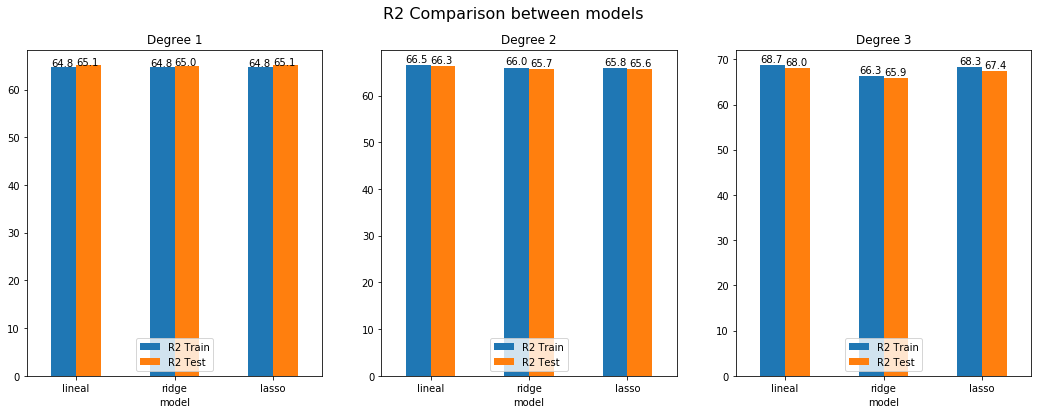

In [110]:
fig = plt.figure(figsize=(18,6))
plt.suptitle("R2 Comparison between models",fontsize=16)
ax1 = fig.add_subplot(131)
results_df.loc[results_df['degree']==1].plot(x='model',y=['R2 Train','R2 Test'],kind='bar',rot=0,title='Degree 1',ax=ax1)
ax1.legend(loc='lower center')
# plt.ylim([0.5,0.58])
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(),4)), (p.get_x() * 1.001, p.get_height() * 1.001))
    
ax2 = fig.add_subplot(132)
results_df.loc[results_df['degree']==2].plot(x='model',y=['R2 Train','R2 Test'],kind='bar',rot=0,title='Degree 2',ax=ax2)
ax2.legend(loc='lower center')
for p in ax2.patches:
    ax2.annotate(str(round(p.get_height(),4)), (p.get_x() * 1.01, p.get_height() * 1.01))

ax3 = fig.add_subplot(133)
results_df.loc[results_df['degree']==3].plot(x='model',y=['R2 Train','R2 Test'],kind='bar',rot=0,title='Degree 3',ax=ax3)
ax3.legend(loc='lower center')
for p in ax3.patches:
    ax3.annotate(str(round(p.get_height(),4)), (p.get_x() * 1.01, p.get_height() * 1.01))




plt.savefig('../Images/Provincias/Scores Modelo Provincias.png')

# Elección del modelo

Podemos observar que los mejores R2 para testeo y training son los correspondientes al modelo de regresion lineal sin normalizaciones, con features polinomiales de orden 3

## División del dataset en Train y Test para portfolio de 100 propiedades.

In [111]:
data_train, data_test = train_test_split(data,test_size=100,shuffle=True,random_state=10)

In [112]:
data_train_final = data_train.copy()
data_test_final = data_test.copy()

In [113]:
data_train_final.shape,data_test_final.shape

((9389, 26), (100, 26))

In [114]:
data_train_final.columns

Index(['tipo_propiedad', 'Provincia', 'Zona', 'Localidad', 'place_name',
       'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry', 'balcon', 'patio',
       'parrilla', 'floor', 'rooms', 'price_usd', 'sup_cub', 'sup_descub',
       'sup_total', 'price_usd_per_m2', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store',
       'Provincia_Buenos Aires Interior', 'Provincia_Córdoba',
       'Provincia_Santa Fe'],
      dtype='object')

## Imputación del número de piso ('floor')

In [115]:
data_train_final['floor'].isna().sum()

5079

In [116]:
data_test_final['floor'].isna().sum()

50

In [117]:
floor_median_localidad = data_train_final.loc[(data_train_final['tipo_propiedad']=='apartment')|(data_train['tipo_propiedad']=='store'),['floor','Localidad']].groupby('Localidad').agg(np.median)
floor_median_localidad['floor'].fillna(value=floor_median_localidad['floor'].mean(),inplace=True)
floor_median_localidad

,floor
Localidad,
Aguas Verdes,8.0
Córdoba,0.0
Lobos,0.0
Luján,0.0
Mar de Ajó,1.0
Mar del Plata,3.0
Miramar,0.0
Necochea,5.0
Pinamar,1.0


In [118]:
for localidad,floor_med in floor_median_localidad['floor'].to_dict().items():
    #imputo en el train set con los valores calculados
    data_train_final.loc[((data_train_final['tipo_propiedad']=='apartment')|(data_train_final['tipo_propiedad']=='store')&(data_train_final['floor'].isna())&(data_train_final['Localidad']==localidad)),'floor']=floor_med
    #tambien imputo en el test set con los valores del train set.
    data_test_final.loc[((data_test_final['tipo_propiedad']=='apartment')|(data_test_final['tipo_propiedad']=='store')&(data_test_final['floor'].isna())&(data_test_final['Localidad']==localidad)),'floor']=floor_med

In [119]:
print("Datos faltantes de floor en train set: {}".format(data_train_final['floor'].isna().sum()))
print("Datos faltantes de floor en test set: {}".format(data_test_final['floor'].isna().sum()))

Datos faltantes de floor en train set: 0
Datos faltantes de floor en test set: 0


In [120]:
data_train_final.loc[data_train_final['floor'].isna(),'Localidad'].value_counts()

Series([], Name: Localidad, dtype: int64)

In [121]:
data_test_final.loc[data_test_final['floor'].isna(),'Localidad'].value_counts()

Series([], Name: Localidad, dtype: int64)

## Imputación de Superficies

In [122]:
data_train_final['const_index']=data_train_final['sup_cub']/data_train_final['sup_total']

data_train_final.head(5)

,tipo_propiedad,Provincia,Zona,Localidad,place_name,cochera,gimnasio,piscina,SUM,laundry,...,sup_descub,sup_total,price_usd_per_m2,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,Provincia_Buenos Aires Interior,Provincia_Córdoba,Provincia_Santa Fe,const_index
4738,house,Córdoba,Córdoba,Villa Carlos Paz,Villa carlos paz,1.0,0.0,1.0,0.0,1.0,...,0.0,300.0,1000.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.000000
3275,apartment,Buenos Aires Costa Atlántica,BsAs,Mar del Plata,Mar del plata,0.0,0.0,0.0,0.0,0.0,...,NaN,30.0,2000.000000,1.0,0.0,0.0,0.0,0.0,0.0,NaN
6140,apartment,Buenos Aires Costa Atlántica,BsAs,Villa Gesell,Villa gesell,0.0,0.0,0.0,0.0,0.0,...,0.0,45.0,2222.222222,1.0,0.0,0.0,0.0,0.0,0.0,1.000000
8233,apartment,Santa Fe,Santa Fe,Rosario,Rosario,1.0,0.0,0.0,0.0,0.0,...,13.0,38.0,1136.432368,1.0,0.0,0.0,0.0,0.0,1.0,0.657895
10037,house,Córdoba,Córdoba,Punilla,Punilla,1.0,0.0,1.0,1.0,1.0,...,0.0,190.0,894.736842,0.0,1.0,0.0,0.0,1.0,0.0,1.000000


In [123]:
const_median_localidad = data_train_final[['const_index','Localidad']].groupby('Localidad').median()
const_median_localidad['const_index'].fillna(value=const_median_localidad['const_index'].median(),inplace=True)
const_median_localidad.head(10)

,const_index
Localidad,
Achiras,1.000000
Aguas Verdes,0.291667
Alta Gracia,0.641429
Alvear,0.600000
Anisacate,0.322222
Arroyo Seco,0.238095
Azul,0.446078
Bahía Blanca,0.532624
Balcarce,0.450000


In [124]:
data_train_final[['sup_cub','sup_total','sup_descub']].isna().sum()

sup_cub       1680
sup_total      593
sup_descub    2273
dtype: int64

In [125]:
for localidad,const_med in const_median_localidad['const_index'].to_dict().items():
    data_train_final.loc[(data_train_final['const_index'].isna())&(data_train_final['Localidad']==localidad),'const_index']=const_med
    data_test_final.loc[(data_test_final['Localidad']==localidad),'const_index']=const_med
    
   

Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de entrenamiento.

In [126]:
data_train_final['sup_cub'].fillna(data_train_final['const_index']*data_train_final['sup_total'],inplace=True)
data_train_final['sup_total'].fillna(data_train_final['sup_cub']/data_train_final['const_index'],inplace=True)
data_train_final['sup_descub'].fillna((data_train_final['sup_total']-data_train_final['sup_cub']),inplace=True)

Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de testeo.

In [127]:
data_test_final['sup_cub'].fillna(data_test_final['const_index']*data_test_final['sup_total'],inplace=True)
#data_test['sup_cub']/data_test['const_index']
data_test_final['sup_total'].fillna(data_test_final['sup_cub']/data_test_final['const_index'],inplace=True)
data_test_final['sup_descub'].fillna((data_test_final['sup_total']-data_test_final['sup_cub']),inplace=True)

In [128]:
data_train_final['cub_desc'] = data_train_final['sup_cub']*data_train_final['sup_descub']
data_train_final['sup_por_room'] = data_train_final['sup_cub']/data_train_final['rooms']

In [129]:
data_train_final[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

In [130]:
data_test_final['cub_desc'] = data_test_final['sup_cub']*data_test_final['sup_descub']
data_test_final['sup_por_room'] = data_test_final['sup_cub']/data_test_final['rooms']

In [131]:
data_test_final[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

In [132]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Provincia','Zona','Localidad','place_name','price_usd','sup_total','const_index','cub_desc']
data_train3 = data_train_final.drop(columns=poly_drop).copy()
y_train = data_train_final[y_column[0]]
data_test3 = data_test_final.drop(columns=poly_drop).copy()
y_test = data_test_final[y_column[0]]

X_train_pol3,X_test_pol3 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train3, df_test = data_test3,degree=3)

Xs_train_pol3 = stdscalerX.fit_transform(X_train_pol3)
ys_train_pol3 = y_train

Xs_test_pol3 = stdscalerX.transform(X_test_pol3)
ys_test_pol3 = y_test

In [133]:
data_test3.shape

(100, 20)

In [134]:
#Linear Model
lm = LinearRegression()
model_linreg3 = lm.fit(Xs_train_pol3, ys_train_pol3)

In [135]:
for _ in range(10):
    kf3 = KFold(n_splits=5, shuffle=True)
    print(cross_val_score(model_linreg3, Xs_train_pol3, ys_train_pol3, cv=kf3))  

[   0.678    0.666 -103.26     0.592    0.673]
[   0.658    0.511    0.687 -104.323    0.694]
[-115.308    0.688    0.495    0.673    0.582]
[ 5.785e-01  6.705e-01  6.871e-01 -1.136e+02 -2.284e+18]
[   0.506 -104.563    0.584    0.673    0.694]
[   0.685    0.674    0.612    0.664 -121.318]
[-102.201    0.573    0.673    0.587    0.679]
[   0.661    0.576    0.545    0.675 -106.524]
[   0.627    0.668 -111.098    0.655    0.588]
[   0.671    0.538    0.589 -127.601    0.699]


In [136]:
y_pred_tr = model_linreg3.predict(Xs_train_pol3)
y_pred_ts = model_linreg3.predict(Xs_test_pol3)

print("Train set")
print("----------------------------")
print_metrics(y_train,y_pred_tr)
print("Test set")
print("----------------------------")
print_metrics(y_test,y_pred_ts)


Train set
----------------------------
MAE: 282.237966
MSE: 146982.231138
RMSE: 383.382617
R2: 0.6888
Test set
----------------------------
MAE: 325.238639
MSE: 212739.688337
RMSE: 461.237128
R2: 0.6815


In [137]:
portfolio = pd.DataFrame(y_test).rename(columns={'price_usd_per_m2':'Real_Price'})
portfolio['Model_Prediction']=y_pred_ts
portfolio['diff'] = portfolio['Model_Prediction']-portfolio['Real_Price']
portfolio['Sobre/Sub'] = portfolio['diff'].apply(lambda x: 'Sobrevaluado' if x>0 else 'Subvaluado')
portfolio['abs_diff']=portfolio['diff'].abs()
portfolio.head(10)

,Real_Price,Model_Prediction,diff,Sobre/Sub,abs_diff
5530,1250.000000,1758.486104,508.486104,Sobrevaluado,508.486104
527,558.139535,317.986104,-240.153431,Subvaluado,240.153431
4521,187.500000,371.423604,183.923604,Sobrevaluado,183.923604
1387,1612.244898,1847.986104,235.741206,Sobrevaluado,235.741206
1585,257.575758,934.548604,676.972846,Sobrevaluado,676.972846
6308,1956.521739,1978.388448,21.866708,Sobrevaluado,21.866708
3728,840.000000,1265.611104,425.611104,Sobrevaluado,425.611104
2903,1121.673519,987.486104,-134.187415,Subvaluado,134.187415
9711,687.500000,1051.361104,363.861104,Sobrevaluado,363.861104
3059,166.666667,855.986104,689.319437,Sobrevaluado,689.319437


In [138]:
sobrevaluados = portfolio.loc[portfolio['Sobre/Sub']=='Sobrevaluado','Sobre/Sub'].count()
subvaluados = portfolio.loc[portfolio['Sobre/Sub']=='Subvaluado','Sobre/Sub'].count()
sobrevaluados,subvaluados

(55, 45)

In [139]:
portfolio.describe()

,Real_Price,Model_Prediction,diff,abs_diff
count,100.000000,100.000000,100.000000,100.000000
mean,1253.019177,1207.110830,-45.908346,325.238639
std,821.340701,595.335666,461.258831,328.694258
min,14.045455,-11.638896,-1461.159730,4.679286
25%,475.362319,673.970479,-240.297148,80.638515
50%,1291.259786,1254.454854,21.073425,231.469058
75%,1769.615882,1787.548604,224.801015,414.681713
max,3333.333333,2101.361104,1412.142354,1461.159730


In [140]:
sobrevaluados = portfolio.loc[portfolio['Sobre/Sub']=='Sobrevaluado','Sobre/Sub'].count()
subvaluados = portfolio.loc[portfolio['Sobre/Sub']=='Subvaluado','Sobre/Sub'].count()
sobrevaluados,subvaluados

(55, 45)

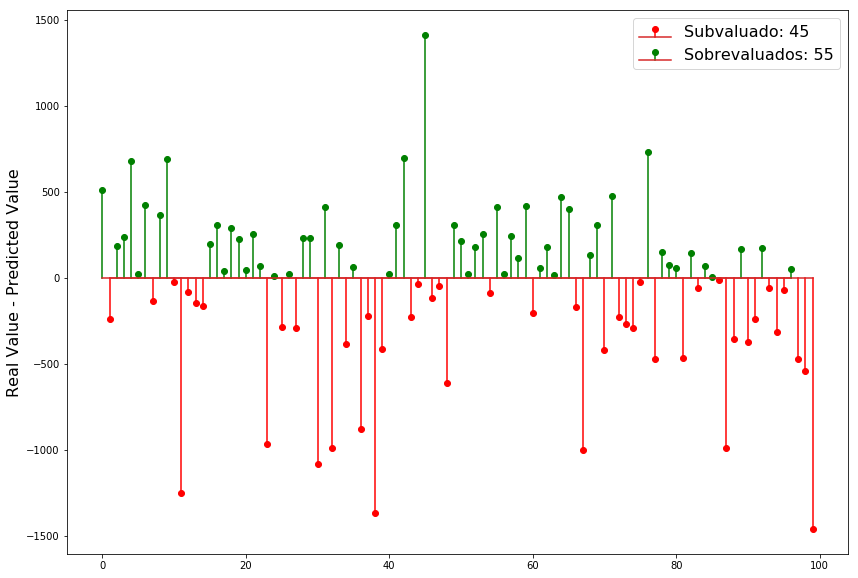

In [141]:
port_df = portfolio.reset_index().drop(columns='index').reset_index()
port_plot_df = port_df.sample(100)
#display(port_plot_df)
#port_plot_df.plot(kind='scatter',x='index',y='diff',figsize=(8,6))
plt.figure(figsize=(14,10))
sobreval = port_plot_df.loc[port_plot_df['Sobre/Sub']=='Sobrevaluado']
subval = port_plot_df.loc[port_plot_df['Sobre/Sub']=='Subvaluado']
#plt.stem(port_plot_df['index'],port_plot_df['diff'])
plt.stem(subval['index'],subval['diff'],linefmt='red',markerfmt='or',label='Subvaluado: '+str(subvaluados))
plt.stem(sobreval['index'],sobreval['diff'],linefmt='green',markerfmt='og',label='Sobrevaluados: '+str(sobrevaluados))
plt.legend(fontsize=16)
plt.ylabel('Real Value - Predicted Value',fontsize=16)
plt.savefig('../Images/Provincias/Portfolio Provincias.png')